# Traitement d'images avec Python : échantillonnage et quantification d'images

### Qu'est-ce que la haute définition ?

Dans cet article, nous explorerons comment la résolution d'image est représentée en vision par ordinateur. Plus précisément, nous examinerons comment la résolution spatiale et la discrétisation des valeurs d’intensité peuvent affecter la qualité globale de l’image.

Commençons.

Comme d'habitude, nous importons des bibliothèques telles que `numpy`, et `matplotlib`.. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imshow, imread

Mais d’abord, définissons ce qu’est l’échantillonnage d’images. **L'échantillonnage d'images** consiste à prendre la valeur de l'image à intervalles spatiaux réguliers. La longueur des intervalles définit la résolution spatiale de l'image.

Pour mieux expliquer cela, essayons d'échantillonner une image analogique d'un cercle où N est le nombre de pixels sur le côté de l'image.

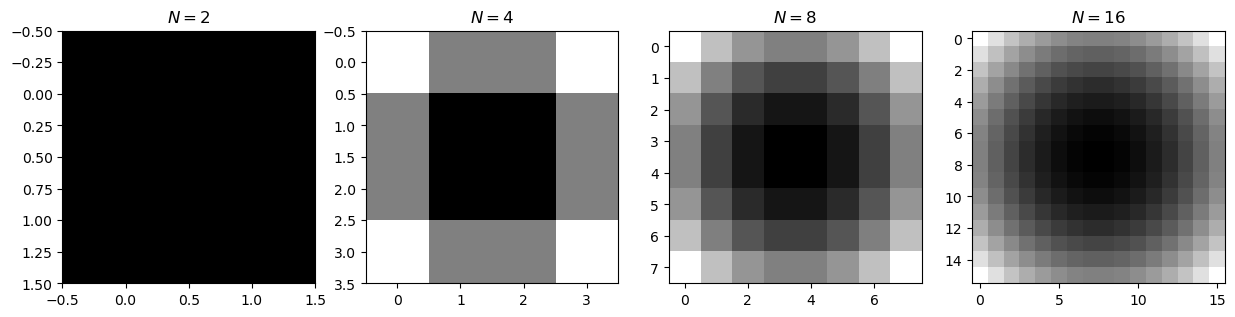

In [2]:
def circle_image(x, y):
    X, Y = np.meshgrid(x, y)
    return X**2 + Y**2

factors = 2**np.arange(1, 5)
fig, ax = plt.subplots(1, len(factors), figsize=(15, 4))
for i, N in enumerate(factors):
    image = circle_image(np.linspace(-1, 1, num=N), np.linspace(-1, 1, num=N))
    ax[i].imshow(image, cmap='gray')
    ax[i].set_title('$N = {}$'.format(N))

Comme on peut le constater, la résolution de l’image est meilleure et les points sont d’autant plus denses que N augmente. Cela signifie qu'à mesure que nous augmentons le nombre de pixels dans l'image, nous pouvons mieux représenter un objet analogique dans une image numérique.

Essayons ceci dans une image réelle. Ici, j'ai une image d'une mosque <i>al-quds</i>.

(1000, 1000, 3)


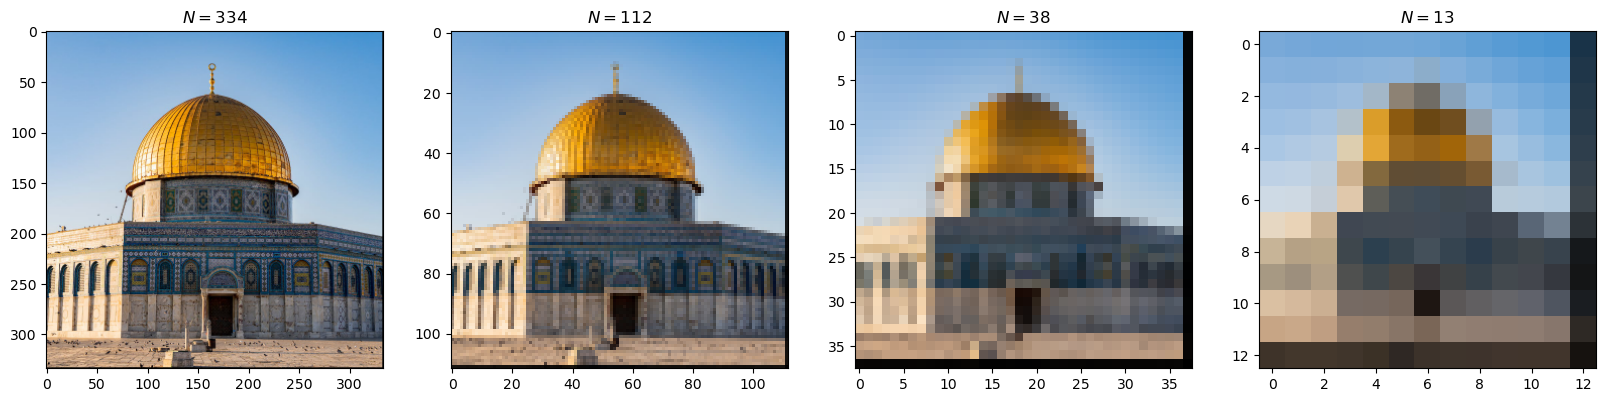

In [14]:
quds = imread('quds.jpg')

from skimage.transform import downscale_local_mean
factors = 3**np.arange(1, 5)
figure, axis = plt.subplots(1, len(factors), figsize=(20, 6))
for factor, ax in zip(factors, axis):
    image = downscale_local_mean(quds, 
                                 factors=(factor, factor, 1)).astype(int)
    ax.imshow(image)
    ax.set_title('$N={}$'.format(image.shape[0]))

Sur les deux premières images, on peut constater qu’il n’y a pas beaucoup de différence. Cela signifie qu’à moins que nous n’ayons besoin de zoomer sur l’image, nous n’avons pas besoin d’une résolution plus élevée sur l’image pour mieux comprendre les détails de l’image.

Cependant, à mesure que l’on diminue encore l’échantillonnage sur la résolution spatiale de l’image, il est clair que l’image n’est plus claire. De nombreuses informations sont perdues et l'image numérique ne peut pas représenter pleinement l'objet analogique.

J'espère que c'est clair. Le prochain concept que nous devons comprendre est la **quantification d'image**. La quantification d'image consiste à discrétiser les valeurs d'intensité de l'image analogique.

Pour le démontrer, essayons de discrétiser une image analogique d'un cercle où k est le nombre de bits représentant une valeur d'intensité.

In [2]:
def circle_image(x, y):
    X, Y = np.meshgrid(x, y)
    return X**2 + Y**2

factors = 2**np.arange(1, 5)
circ_image = circle_image(np.linspace(0, 1, num=4), 
                          np.linspace(0, 1, num=4))
fig, ax = plt.subplots(1, len(factors), figsize=(15, 4))
for i, k in enumerate(factors):
    bins = np.linspace(0, circ_image.max(), k)
    image = np.digitize(circ_image, bins)
    image = np.vectorize(bins.tolist().__getitem__)(image-1)
    ax[i].imshow(image)
    ax[i].set_title('$k = {}$'.format(k),sizeof(image))
    

NameError: name 'np' is not defined

Comme nous pouvons l’observer, la représentation des couleurs de l’image est bien meilleure à mesure que k augmente. Cela signifie que plus nous augmentons le nombre de valeurs discrètes représentant les valeurs d'intensité de l'image dans l'image, mieux nous pouvons représenter un objet analogique dans une image numérique.

Encore une fois, essayons ceci avec notre image de la mosque.

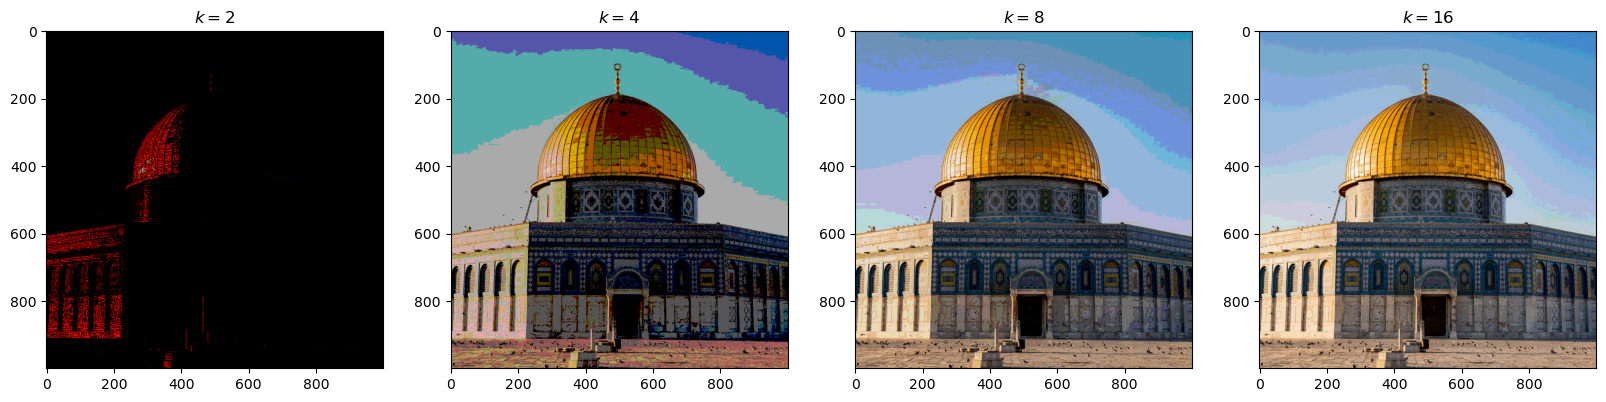

In [10]:
factors = 2**np.arange(1, 5)
figure, axis = plt.subplots(1, len(factors), figsize=(20, 6))
for k, ax in zip(factors, axis):
    bins = np.linspace(0, quds.max(), k)
    image = np.digitize(quds, bins)
    image = (np.vectorize(bins.tolist().__getitem__)
                         (image-1).astype(int))
    ax.imshow(image)
    ax.set_title('$k = {}$'.format(k))

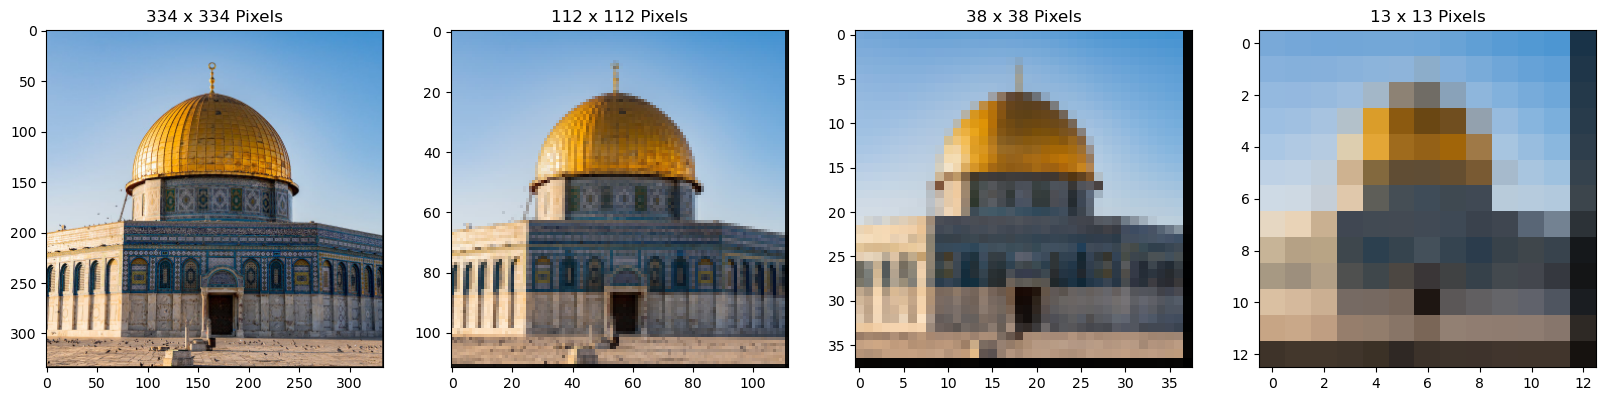

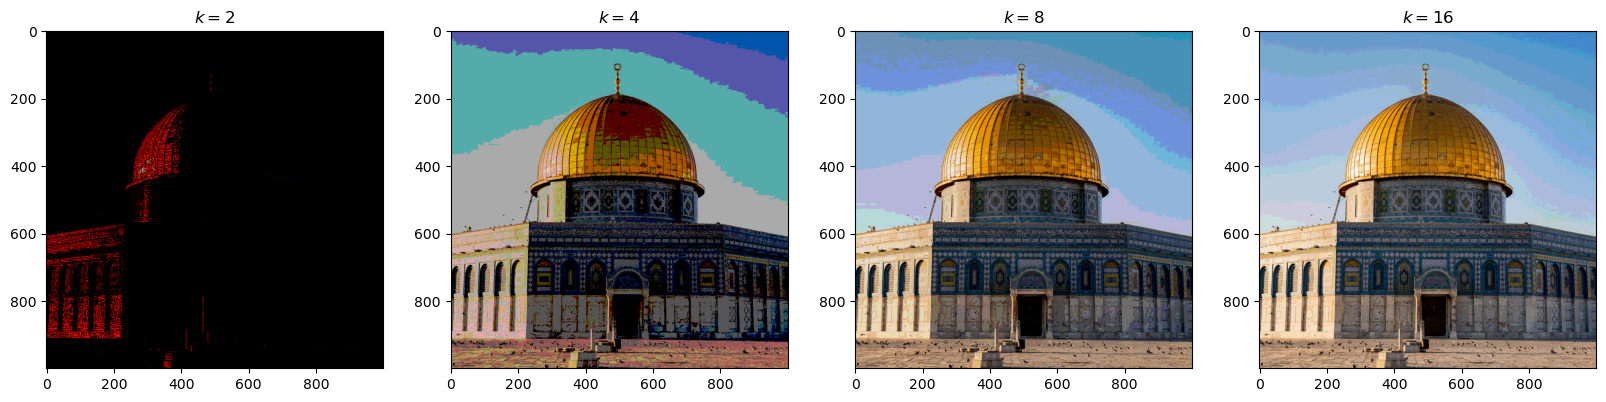

In [12]:
quds = imread('quds.jpg')

from skimage.transform import downscale_local_mean


    #ax.set_title(str(image.shape[0]) + " x " + str(image.shape[0]) + " Pixels")
   

def echontillonage(quds):
    factors = 3**np.arange(1, 5)
    figure, axis = plt.subplots(1, len(factors), figsize=(20, 6))
    for factor, ax in zip(factors, axis):
        image = downscale_local_mean(quds, factors=(factor, factor, 1)).astype(int)
        #ax.imshow(image)
        return image.shape[0]

def quantification():
    

    

    
    
factors = 2**np.arange(1, 5)
figure, axis = plt.subplots(1, len(factors), figsize=(20, 6))
for k, ax in zip(factors, axis):
    bins = np.linspace(0, quds.max(), k)
    image = np.digitize(quds, bins)
    image = (np.vectorize(bins.tolist().__getitem__)
                         (image-1).astype(int))
    ax.imshow(image)
    ax.set_title('$k = {}$'.format(k))

Sur le spectre inférieur, nous pouvons voir qu’à mesure que nous réduisons la discrétisation de l’image, la dégradation de la qualité de l’image devient plus apparente. Cela arrive au point où l’image numérique ne peut plus représenter les différentes nuances de couleur de l’objet analogique en raison de la plage de valeurs d’intensité limitée.

Sur le spectre supérieur, on constate qu’il n’y a pas beaucoup de différence. Cela signifie qu’il existe une limite au nombre de valeurs d’intensité discrètes que l’œil humain peut percevoir. Si nous augmentons encore le nombre de valeurs d’intensité discrètes, il y aura peu ou pas de différence dans la qualité de l’image.

#### En résumé

Nous avons exploré comment la qualité de l'image peut être améliorée et dégradée à l'aide de l'échantillonnage et de la quantification d'images. Trop peu d’échantillonnage ou de quantification des images peut dégrader considérablement leur qualité, alors qu’un excès d’échantillonnage ou de quantification ne peut entraîner aucune amélioration progressive de la qualité de l’image.

In [17]:
from PIL.Image import *

In [28]:
quds = open('quds.jpg')

d = set()

for i in range(10):
    for j in range(10):
        c = quds.getpixel((i,j))
        d.add(c)
 
print(len(c))

3
